<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/momentum_investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
nifty50_url = "https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
nifty_stocks = tickers
start_date='2015-01-01'
end_date='2019-12-26'

In [3]:
dataset = yf.download(nifty_stocks, start=start_date,end=end_date)['Adj Close']


[*********************100%%**********************]  50 of 50 completed


In [5]:
'''
# Define the list of Nifty 50 constituents
nifty_50_constituents = ['RELIANCE.NS', 'SBIN.NS', 'TCS.NS']  # Add more constituents as needed

# Download historical data for each constituent
data = {}
for ticker in nifty_50_constituents:
    data[ticker] = yf.download(ticker, start='1927-01-01', end='2014-12-31')
'''
# Combine the adjusted close prices into a single DataFrame

adj_close_data = {}
for ticker, df in dataset.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[ticker] = df['Adj Close']
    elif isinstance(df, pd.Series):
        adj_close_data[ticker] = df  # Assuming the Series itself represents the 'Adj Close' prices

adj_close = pd.DataFrame(adj_close_data)


# Calculate monthly returns
returns = adj_close.pct_change(252)

# Step 2: Calculate the monthly momentum variable
momentum_variable = returns.rolling(window=252).sum()

# Step 3: Select the top 25 stocks based on momentum variable
top_50_stocks = momentum_variable.sum().index
top_50_stocks_data = returns[top_50_stocks]

#
# Step 4: Implement PCA on the selected stocks after handling missing values
cleaned_data = top_50_stocks_data.dropna()  # Drop rows with missing values


In [6]:
cleaned_data

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-27,0.870976,-0.074921,0.174374,0.151849,0.152747,-0.172682,0.146656,0.364946,-0.320740,-0.299331,...,-0.042083,-0.154260,-0.573139,-0.204249,0.417190,0.465054,0.167878,-0.058878,0.074509,0.060711
2018-11-28,0.813452,-0.078670,0.167450,0.143482,0.151885,-0.180314,0.124980,0.338704,-0.348701,-0.331985,...,-0.057400,-0.206834,-0.587589,-0.202815,0.489521,0.496052,0.182461,-0.039841,0.072164,0.057629
2018-11-29,1.038356,-0.072694,0.129713,0.172056,0.154718,-0.157642,0.154872,0.387378,-0.356127,-0.324010,...,-0.096997,-0.191590,-0.582204,-0.198708,0.488787,0.423693,0.147191,-0.029331,0.045515,0.074585
2018-11-30,0.924999,-0.113406,0.105290,0.154352,0.157724,-0.154251,0.158363,0.432995,-0.358346,-0.327450,...,-0.076907,-0.194613,-0.598810,-0.204455,0.490341,0.495979,0.145125,-0.051993,0.027004,0.106728
2018-12-03,1.012423,-0.072602,0.139094,0.162689,0.148213,-0.144705,0.168973,0.424864,-0.341928,-0.324993,...,-0.161499,-0.211137,-0.588387,-0.193406,0.500719,0.488689,0.166830,-0.030399,-0.009931,0.121859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,0.326451,-0.000141,0.129323,0.347389,0.207856,0.188664,0.586727,0.654533,0.526081,0.571265,...,0.071818,0.491629,0.033097,-0.118454,0.115661,0.105711,0.265267,0.026900,0.142327,-0.013222
2019-12-19,0.402794,0.016196,0.179257,0.402349,0.239017,0.210567,0.636308,0.685176,0.610203,0.595550,...,0.038718,0.524840,0.101445,-0.101473,0.155299,0.148337,0.285467,0.047535,0.139219,0.004688
2019-12-20,0.435355,-0.002555,0.145367,0.374364,0.226540,0.175603,0.586879,0.666237,0.626055,0.586107,...,0.053120,0.530289,0.083436,-0.071174,0.150668,0.152776,0.317212,0.050479,0.153557,0.010145


In [7]:
#cleaned_data = cleaned_data.clip(lower=cleaned_data.quantile(0.01), upper=cleaned_data.quantile(0.99), axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

pca = PCA(n_components=1)  # Considering only one component for simplicity
pca.fit(scaled_data)

# Step 5: Select the top 10 stocks based on PCA scores
pca_scores = pca.components_[0]
top_10_index = np.argsort(pca_scores)[-10:]
top_10_stocks = cleaned_data.iloc[:, top_10_index]

# Now, top_10_stocks contains the top 10 stocks for investment based on PCA scores
print(top_10_stocks)


            ICICIBANK.NS  TATAMOTORS.NS  TITAN.NS  ADANIPORTS.NS  \
Date                                                               
2018-11-27      0.101767      -0.573139  0.167878      -0.074921   
2018-11-28      0.138213      -0.587589  0.182461      -0.078670   
2018-11-29      0.143513      -0.582204  0.147191      -0.072694   
2018-11-30      0.124771      -0.598810  0.145125      -0.113406   
2018-12-03      0.123941      -0.588387  0.166830      -0.072602   
...                  ...            ...       ...            ...   
2019-12-18      0.544459       0.033097  0.265267      -0.000141   
2019-12-19      0.557658       0.101445  0.285467       0.016196   
2019-12-20      0.554328       0.083436  0.317212      -0.002555   
2019-12-23      0.566688       0.120624  0.338980       0.022116   
2019-12-24      0.582328       0.110057  0.296218       0.036666   

            BAJAJ-AUTO.NS  HDFCLIFE.NS   BPCL.NS  BHARTIARTL.NS  \
Date                                            

In [8]:
print(top_10_stocks.columns.tolist())

['ICICIBANK.NS', 'TATAMOTORS.NS', 'TITAN.NS', 'ADANIPORTS.NS', 'BAJAJ-AUTO.NS', 'HDFCLIFE.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'TATACONSUM.NS', 'SBILIFE.NS']


[*********************100%%**********************]  10 of 10 completed


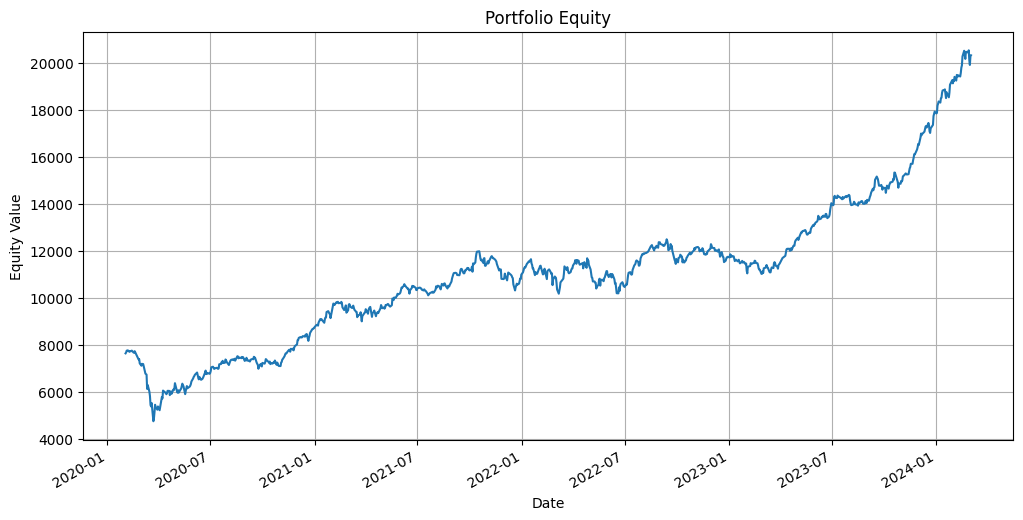

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Define stock symbols and weights
symbols = top_10_stocks.columns.tolist()
weights = [1,1,1,1,1,1,1,1,1,1]
# Download historical price data
data = yf.download(symbols, start="2020-02-01", end=today)["Adj Close"]

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()